In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold

In [2]:
# Data params
textures = 11
trials = 100

# Set bin and sim params
bin_size = 10   # Bin size in ms
sim_length = 300   # Sim time in ms
bins = sim_length / bin_size

In [3]:
# Import dataset and labels from pickle
PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/histogram_classifier/"
DATA_NAME = str(sim_length) + "ms - " + str(bin_size) + "ms bin size dataset.pickle"
LABEL_NAME = str(textures) + " textures - " + str(trials) + " trials labels.pickle"

# Import dataset first
FILENAME = PATH + DATA_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        dataset = pickle.load(openfile)
    except EOFError:
        print(EOFError)
        
# Import dataset first
FILENAME = PATH + LABEL_NAME

# Create array of intensities for heatmap
with(open(FILENAME, "rb")) as openfile:
    try:
        labels = pickle.load(openfile)
    except EOFError:
        print(EOFError)

In [4]:
print(len(dataset))

1100


In [5]:
# WARNING: Dataset created from previous script contains a NULL row 0
#          This row has currently been deleted and saved over the initial dataset
#          Note for next time is to fix this bug
# print(dataset[0])
# dataset = np.delete(dataset, 0, 0)
# print(len(dataset))

# Split data into testing and training
# Ration currently 80-20
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [6]:
# # Create knn classifier w/5 neighbours and fit it to the training data
# # Play around with this value when determining accuracy
# knn = KNeighborsClassifier(n_neighbors=10)

# # Fit the model to the training data
# knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [7]:
# Create kfold validation model
kf = KFold(n_splits=10, random_state=63, shuffle=True)

In [10]:
# Use sklearn accuracy metrics to asses
# Test over a range of neighbour numbers
# TO DO: Use KFold cross validation for this method

accuracy_scores = []
recall_scores = []
precision_scores = []

for n in range(1,21,1):
    knn = KNeighborsClassifier(n_neighbors=n)
    
#     # Loop through each of the folds within the kfold
#     for train_index, val_index in kf.split(x_train):
#         # Create folded data
#         Xtrain, Xval = x_train[train_index], x_train[val_index]
#         ytrain, yval = y_train[train_index], y_train[val_index]
        
    # Fit the model to the new folded training data
    knn.fit(x_train, y_train)
        
    # Precit value using KNN
    y_pred = knn.predict(x_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average = 'macro'))
    precision_scores.append(precision_score(y_test, y_pred, average = 'macro'))


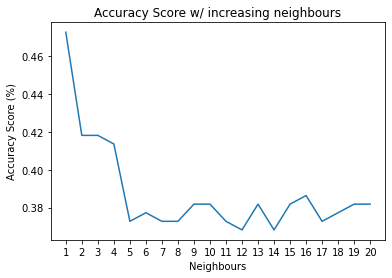

In [12]:
# Plot the change in accuracy over neighbours
#x_vals = np.array([(list(range(1,21,1)))])
#x_vals = np.arange(1,21,1)
x_vals = np.arange(1, 21, 1)
accuracy_scores = np.array(accuracy_scores)
recall_scores = np.array(recall_scores)
precision_scores = np.array(precision_scores)

plt.plot(x_vals, accuracy_scores)
plt.xlabel("Neighbours")
plt.ylabel("Accuracy Score (%)")
plt.xticks(x_vals)
plt.title("Accuracy Score w/ increasing neighbours")
plt.show()

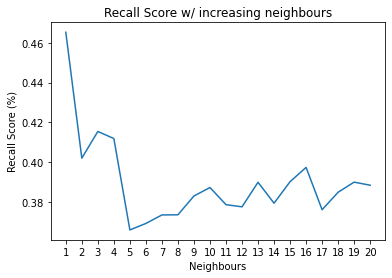

In [13]:
plt.plot(x_vals, recall_scores)
plt.xlabel("Neighbours")
plt.ylabel("Recall Score (%)")
plt.xticks(x_vals)
plt.title("Recall Score w/ increasing neighbours")
plt.show()

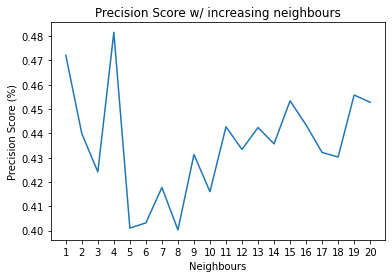

In [14]:
plt.plot(x_vals, precision_scores)
plt.xlabel("Neighbours")
plt.ylabel("Precision Score (%)")
plt.xticks(x_vals)
plt.title("Precision Score w/ increasing neighbours")
plt.show()